# ERBlet

Implemented by [LTFAT](https://ltfat.org/) (Large Time-Frequency Analysis Toolbox) in Matlab/Octave
- ERBlet Paper: https://ieeexplore.ieee.org/document/6637697
- LTFAT Documentation: https://ltfat.org/doc/
- LTFAT Github: https://github.com/ltfat/ltfat

In [ ]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
# from transform import *
from transform_audio import *
# from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))
DATA = "ravdess"
PITCH_NORMALIZED = False
TRIMMED = False
SUFFIX = ''
if PITCH_NORMALIZED:
    SUFFIX += '-pitch-normalized'
if TRIMMED:
    SUFFIX += '-trimmed'


data_dir  = os.path.join(ROOT_DIR, 'raw-data', DATA, f'full-{DATA}-audio-processed{SUFFIX}')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [2]:
transform_list(erblet_file, file_list, file_names, affix='erb-pn')

Computing and exporting coefficients:   0%|          | 0/1440 [00:00<?, ?it/s]

In [2]:
test_file_idx = 42

In [3]:
coefs, freqs = erblet_file(file_list[test_file_idx], True, True)

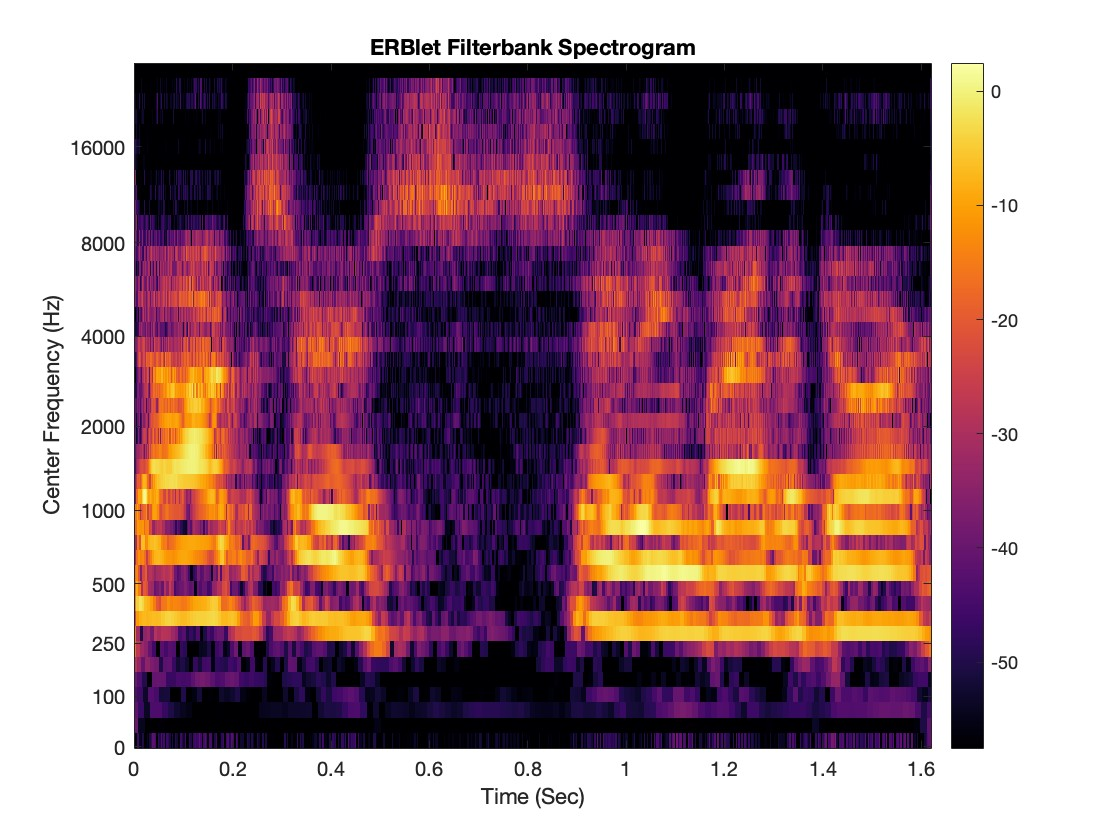

In [4]:
print('freq : samples')
for c, f in zip(coefs, freqs):
    print(f'{round(f):>5} : {len(c)}')

freq : samples
    0 : 566
   26 : 119
   55 : 133
   88 : 148
  124 : 165
  164 : 184
  208 : 205
  258 : 228
  314 : 254
  376 : 283
  445 : 315
  521 : 351
  607 : 390
  702 : 435
  808 : 484
  926 : 540
 1058 : 601
 1205 : 670
 1368 : 746
 1550 : 831
 1753 : 925
 1979 : 1031
 2231 : 1148
 2511 : 1279
 2823 : 1425
 3171 : 1587
 3558 : 1768
 3990 : 1969
 4471 : 2194
 5007 : 2444
 5603 : 2722
 6268 : 3032
 7009 : 3378
 7834 : 3763
 8753 : 4192
 9776 : 4669
10917 : 5202
12187 : 5794
13602 : 6455
15179 : 7190
16935 : 8010
18891 : 8923
21070 : 9940
23498 : 11073
24000 : 30920


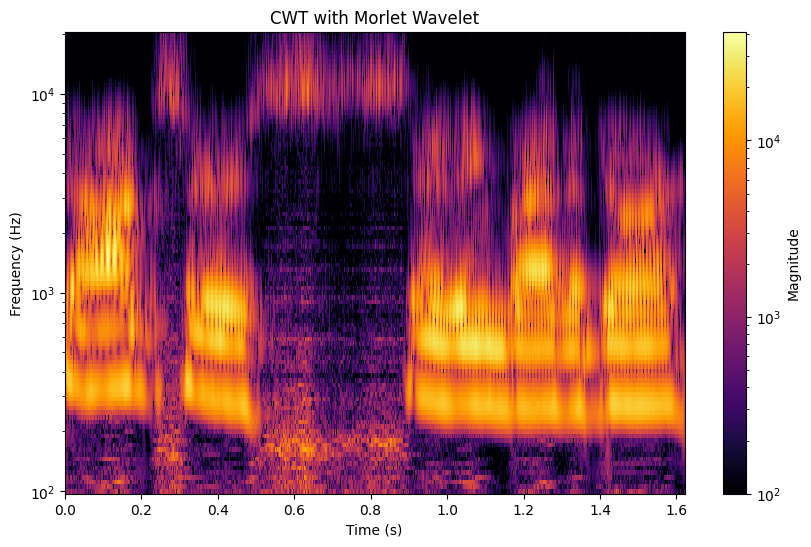

In [5]:
# for comparison
cwt_file(file_list[test_file_idx], low_freq=100, high_freq=20000, visualize=True);

In [6]:
if USE_MATLAB:
    eng.quit() # will remove erblet figure

## Frequency band grouping

In [ ]:
transform_dir = os.path.join(ROOT_DIR, 'raw-data', DATA, f'{DATA}-transforms')
coefs_npz_path = os.path.join(transform_dir, 'erb_coefs.npz')
freqs_npy_path = os.path.join(transform_dir, 'erb_freqs.npy')

In [3]:
freqs = np.load(freqs_npy_path)
avg_lengths = np.zeros_like(freqs, dtype=int)
with np.load(coefs_npz_path, allow_pickle=True) as coefs_npz:
    for file in coefs_npz:
        avg_lengths += np.array([len(c) for c in coefs_npz[file]])
    avg_lengths //= len(coefs_npz)
avg_lengths

array([  582,   123,   137,   152,   169,   189,   210,   234,   261,
         291,   324,   361,   402,   448,   499,   555,   619,   689,
         768,   855,   953,  1061,  1182,  1317,  1467,  1634,  1821,
        2028,  2260,  2517,  2804,  3124,  3480,  3876,  4318,  4810,
        5358,  5969,  6649,  7407,  8252,  9192, 10240, 11407, 31854])

In [4]:
subsample_every = avg_lengths // 100
subsample_every

array([  5,   1,   1,   1,   1,   1,   2,   2,   2,   2,   3,   3,   4,
         4,   4,   5,   6,   6,   7,   8,   9,  10,  11,  13,  14,  16,
        18,  20,  22,  25,  28,  31,  34,  38,  43,  48,  53,  59,  66,
        74,  82,  91, 102, 114, 318])

In [6]:
bands = freq_band_groupings(
    coefs_npz_path=coefs_npz_path,
    ks_threshold=0.05,
    batch_size=15,
    subsample_every=subsample_every,
    debug=True
)
bands

[0, 22) ~ [22, 45): presplit
  [0, 11) ~ [11, 22): 0.03416, 0.0
  [22, 33) ~ [33, 45): 0.20802, 0.0
    [22, 27) ~ [27, 33): 0.10392, 0.0
      [22, 24) ~ [24, 27): 0.03644, 0.0
      [27, 30) ~ [30, 33): 0.06180, 0.0
        [27, 28) ~ [28, 30): 0.03530, 1.820611293881455e-211
        [30, 31) ~ [31, 33): 0.03142, 3.7096780860209764e-166
    [33, 39) ~ [39, 45): 0.19252, 0.0
      [33, 36) ~ [36, 39): 0.04122, 0.0
      [39, 42) ~ [42, 45): 0.19924, 0.0
        [39, 40) ~ [40, 42): 0.06531, 0.0
          [40, 41) ~ [41, 42): 0.04166, 2.1584108657796088e-219
        [42, 43) ~ [43, 45): 0.25018, 0.0
          [43, 44) ~ [44, 45): 0.50010, 0.0


[(0, 22),
 (22, 27),
 (27, 30),
 (30, 33),
 (33, 39),
 (39, 40),
 (40, 42),
 (42, 43),
 (43, 44),
 (44, 45)]